In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day43-outlier-removal-using-iqr-method/placement.csv'
df = pd.read_csv(url)

In [3]:
df.shape

(1000, 3)

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
513,6.43,46.0,0
220,7.75,16.0,1
559,6.61,58.0,1
484,5.81,18.0,0
639,6.42,43.0,1


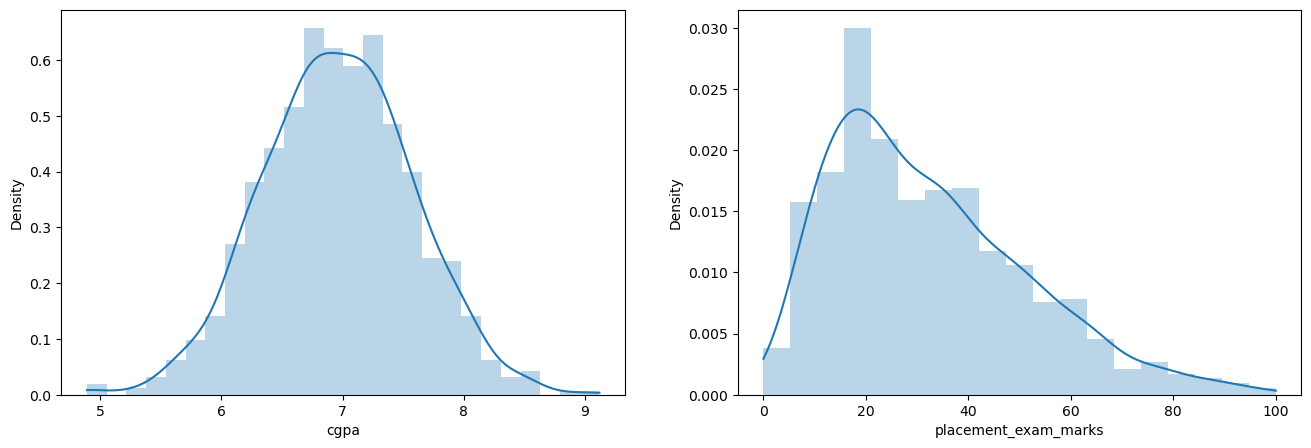

In [6]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde = True, stat='density',alpha = .3, linewidth = 0)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde = True, stat='density',alpha = .3, linewidth = 0)

plt.show()

In [7]:
print('mean value of cgpa',df['cgpa'].mean())
print('std value of cgpa',df['cgpa'].std())
print('min value of cgpa',df['cgpa'].min())
print('max value of cgpa',df['cgpa'].max())

mean value of cgpa 6.96124
std value of cgpa 0.6158978751323894
min value of cgpa 4.89
max value of cgpa 9.12


In [8]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [9]:
df['cgpa'].skew()

np.float64(-0.014529938929314918)

In [11]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

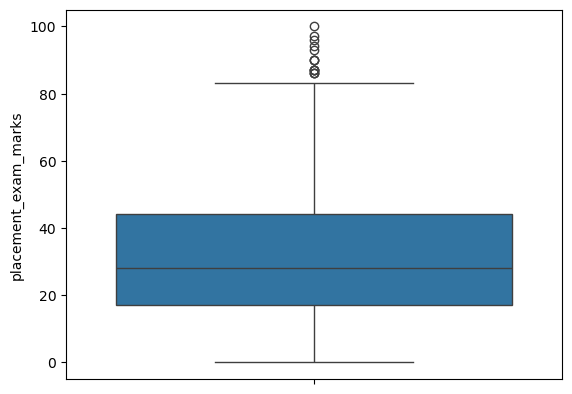

In [12]:
sns.boxplot(df['placement_exam_marks'])

In [13]:
#finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [14]:
percentile75

np.float64(44.0)

In [15]:
iqr = percentile75 - percentile25

In [16]:
upper = percentile75 + 1.5*iqr
lower = percentile25 - 1.5*iqr

In [18]:
print('upper limit',upper)
print('lower limit',lower)

upper limit 84.5
lower limit -23.5


## finding Outliers

In [19]:
df[df['placement_exam_marks'] > upper]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [20]:
df[df['placement_exam_marks'] < lower]

,cgpa,placement_exam_marks,placed


## Trimming

In [21]:
new_df = df[df['placement_exam_marks']<upper]

In [22]:
new_df.shape

(985, 3)

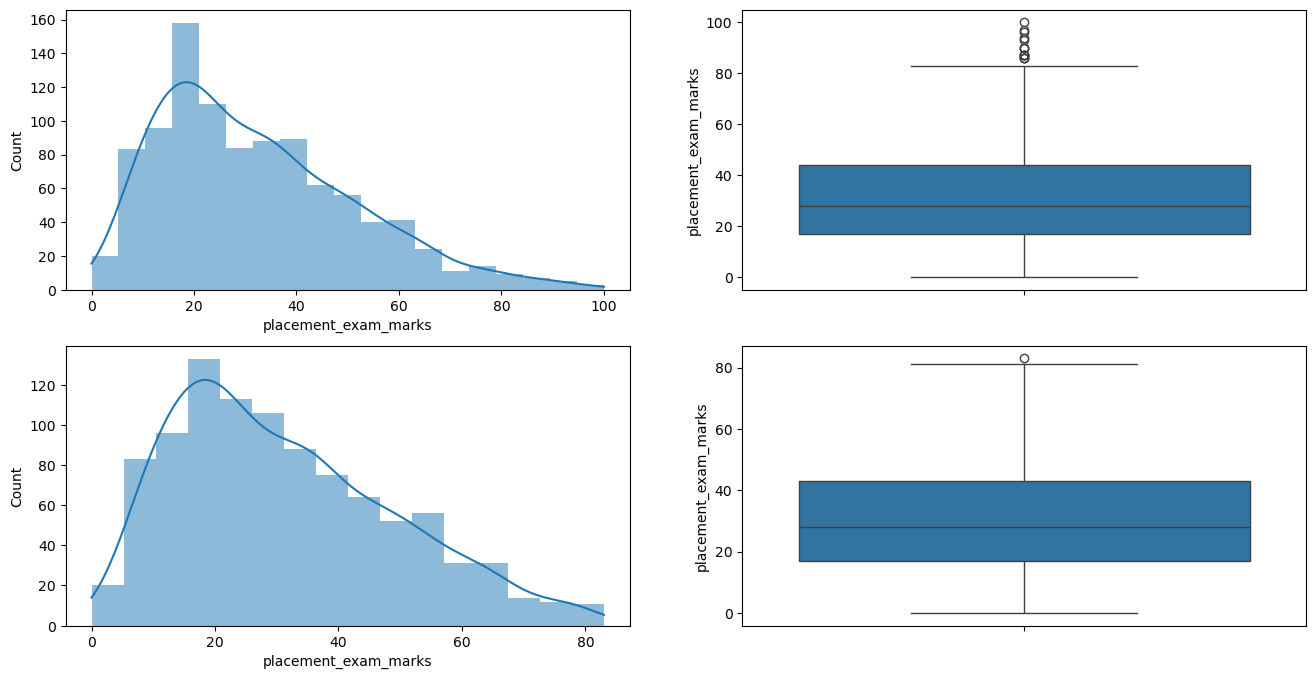

In [24]:
#compare

plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde = True, linewidth = 0)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'],kde = True, linewidth = 0)

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

## capping

In [25]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks']>upper,
    upper,
    np.where(
        new_df_cap['placement_exam_marks']<lower,
        lower,
        new_df_cap['placement_exam_marks'])
)

In [26]:
new_df_cap.shape

(1000, 3)

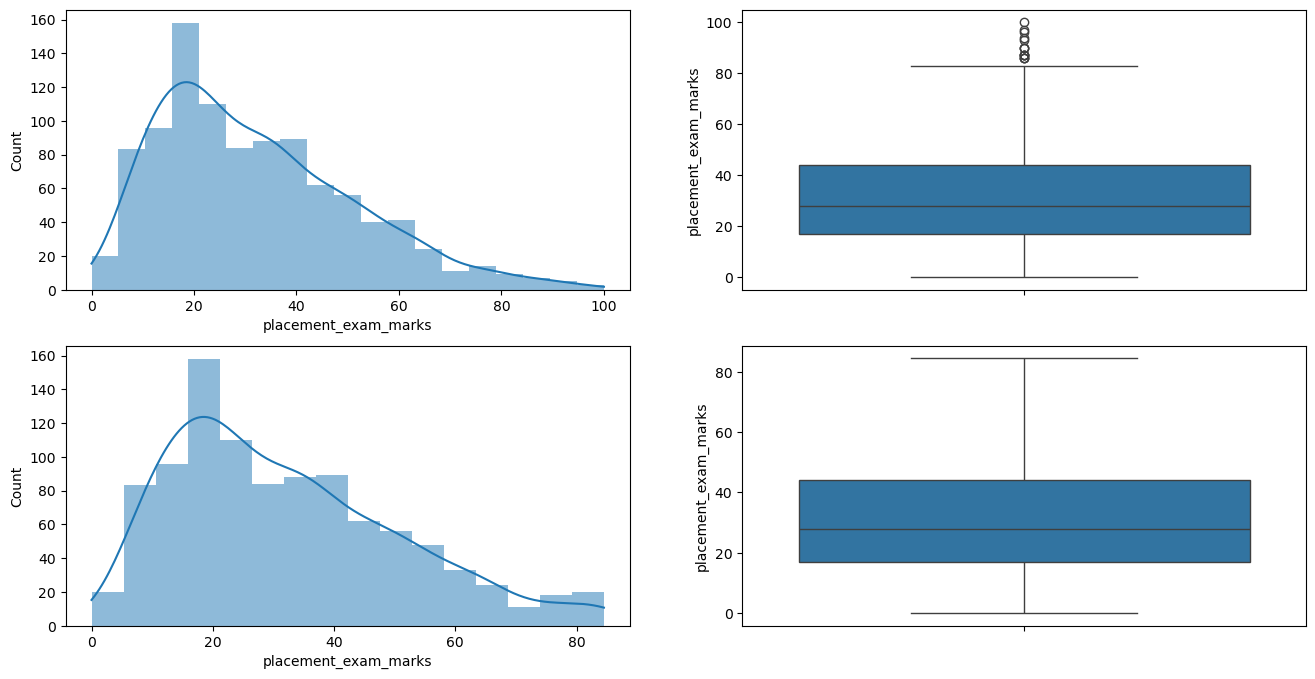

In [27]:
#comparing

plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde = True, linewidth = 0)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'],kde = True, linewidth = 0)

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()